# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


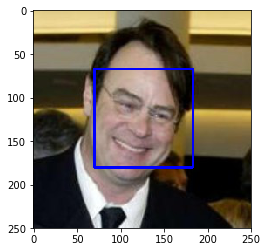

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
The number of human faces detected is 98% and number of dog faces detected as humans is 17%.

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#


## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
num_human_faces = 0
num_dog_faces   = 0

for i in range(len(human_files_short)):
    face = face_detector(human_files_short[i])
    dog  = face_detector(dog_files_short[i])
    if face:
        num_human_faces += 1
    if dog:
        num_dog_faces   += 1
        
print(num_human_faces)
print(num_dog_faces)


98
17


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [22]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

VGG16 = VGG16.to(device)
# check if CUDA is available
#use_cuda = torch.cuda.is_available()
# move model to GPU if CUDA is available
#if use_cuda:
 #   VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 100506228.40it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [6]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    image     = Image.open(img_path)
    transform = transforms.Compose([transforms.Resize(255),
                                  transforms.CenterCrop(224),
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])
    image     = transform(image)
   
    # VGG network expects 4 dimensional data as input. Following line converts the input image in 4D ([1, 3, 224, 224])
    input_img = image.unsqueeze(0)

    #Invoke evaluation path of the model to use pretrained model
    input_img = input_img.to(device)

    VGG16.eval()
    logps     = VGG16.forward(input_img)
    ps        = torch.exp(logps)
    
    #Get the top 1 class that is predicted for the given input image
    top_ps, top_class = ps.topk(1, dim=1)
    
    #Convert the returned tensor into integer before returning from the function
    return int(top_class)
    
   

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [7]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
 
    predicted_class = VGG16_predict(img_path)

    if predicted_class >=151 and predicted_class <=268:
          return True
    else:
        return False


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
0% human faces are detected as dog faces and 
100% dog faces are detected.

In [26]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

num_human_dog_faces = 0
num_dog_faces       = 0

for i in range(len(human_files_short)):
    dog_face = dog_detector(human_files_short[i])
    dog      = dog_detector(dog_files_short[i])
    if dog_face:
        num_human_dog_faces += 1
    if dog:
        num_dog_faces       += 1
        
print(num_human_dog_faces)
print(num_dog_faces)


0
100


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [27]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
# define Resnet50 model
ResNet50 = models.resnet50(pretrained=True)

ResNet50 = ResNet50.to(device)


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 96898321.87it/s]


In [28]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
def ResNet50_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    image     = Image.open(img_path)
    transform = transforms.Compose([transforms.Resize(255),
                                  transforms.CenterCrop(224),
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])
    image     = transform(image)
   
    # ResNet50 network expects 4 dimensional data as input. Following line converts the input image in 4D ([1, 3, 224, 224])
    input_img = image.unsqueeze(0)
    input_img = input_img.to(device)
    #Invoke evaluation path of the model to use pretrained model
    
    ResNet50.eval()
    logps     = ResNet50.forward(input_img)
    ps        = torch.exp(logps)
    
    #Get the top 1 class that is predicted for the given input image
    top_ps, top_class = ps.topk(1, dim=1)
    
    #Convert the returned tensor into integer before returning from the function
    return int(top_class)

In [29]:
### returns "True" if a dog is detected in the image stored at img_path
def resnet_dog_detector(img_path):
    
    predicted_class = ResNet50_predict(img_path)
    #print(predicted_class)
    if predicted_class >=151 and predicted_class <=268:
          return True
    else:
        return False


In [30]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

num_human_dog_faces = 0
num_dog_faces       = 0

for i in range(len(human_files_short)):
    dog_face = resnet_dog_detector(human_files_short[i])
    dog      = resnet_dog_detector(dog_files_short[i])
    if dog_face:
        num_human_dog_faces += 1
    if dog:
        num_dog_faces       += 1
        
print(num_human_dog_faces)
print(num_dog_faces)


0
99


__Evaluation of ResNet50 for dog detector__

Resnet50 gives better dog detection accuracy for dog_files_short and the accuracy is 99%.

It does not detect any human face as a dog similar to VGG network.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [31]:
import os
from torchvision import datasets

data_dir = ('/data/dog_images')
train_transforms = transforms.Compose([transforms.RandomRotation(40),
                                       transforms.Resize(255),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

test_transforms  = transforms.Compose([transforms.Resize(255),
                                       transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

valid_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

#Load the data
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data  = datasets.ImageFolder(data_dir + '/test',  transform=test_transforms )
valid_data = datasets.ImageFolder(data_dir + '/valid', transform=valid_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=32)
testloader  = torch.utils.data.DataLoader(test_data, batch_size=32 )

loaders_scratch = {'train': trainloader, 'valid': validloader, 'test': testloader}


In [32]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # Convolution layer1 - 16 nodes with 3x3 filter and padding =2, input 224x224
        self.conv1   = nn.Conv2d(3, 16, 3, padding=1)
        # Convolution Layer2 - input channels = 16, nodes = 32, kernel = 3x3, padding = 1, input 112x112 after pool
        self.conv2   = nn.Conv2d(16, 32, 3, padding=1)
        # Convolutional layer3 - input = 32, nodes = 64, kernel = 3x3, padding =1, input 56x56 after pool
        self.conv3   = nn.Conv2d(32, 64, 3, padding=1)
        # Convolutional layer4 - input channels = 64, nodes = 128, kernel = 3x3, padding = 1, input 28x28
        self.conv4   = nn.Conv2d(64, 128, 3, padding=1)
        # Convolutional Layer4 - input channels = 128, nodes = 256, kernel 3x3, padding = 1, input 14x14 
        self.conv5   = nn.Conv2d(128, 256, 3, padding=1)
        # Convolutional Layer6 - input channels = 256, nodes = 512, kernel 3x3, padding = 1, input 7x7
        self.conv6   = nn.Conv2d(256, 512, 3, padding=1)
        # Max pooling layer
        self.pool    = nn.MaxPool2d(2,2)
        # Fully Connected layer (input 256x7x7, output 512)
        self.fc1     = nn.Linear(512*1*1, 133)
        # Fully connected layer - input 512, output 133 
        #self.fc2     = nn.Linear(512, 133)
        # Dropout layer
        self.dropout = nn.Dropout(p=0.2)
        #Batch nomr layer
        self.bn1     = nn.BatchNorm2d(16)
        self.bn2     = nn.BatchNorm2d(32)
        self.bn3     = nn.BatchNorm2d(64)
        self.bn4     = nn.BatchNorm2d(128)
        self.bn5     = nn.BatchNorm2d(256)
        self.bn6     = nn.BatchNorm2d(512)
        self.aap     = nn.AdaptiveAvgPool2d(1)
    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = self.bn1(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = self.bn2(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = self.bn3(x)
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = self.bn4(x)
        x = F.relu(self.conv5(x))
        x = self.pool(x)
        x = self.bn5(x)
        x = F.relu(self.conv6(x))
        x = self.pool(x)
        x = self.bn6(x)
        x = self.aap(x)
        
        # Flatten image input
        x = x.view(-1, 512)
        # Adding dropout layer
        x = self.dropout(x)
        # First fully connected layer
        x = self.fc1(x)
      #  x = F.softmax(x, dim=1)
     
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

print(model_scratch)

# move tensors to GPU if CUDA is available
model_scratch = model_scratch.to(device)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=133, bias=True)
  (dropout): Dropout(p=0.2)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:  
The code uses the following transformations for resizing:
1. Rotated the training data to augment the kind of input data that can occur  
2. Resized to 255x255 size    
2. Cropped the data to 224x224 since all the pretrained models used 224x224 images for their training  
3. For the training data, did a horizontal flip to augment the data set. Vertical flip does not make sense here as none of the dogs will be standing on their head in real life.  
4. Converted the data to Tensor data type so that it could be used with pytorch models  
5. Repeated the same steps for test and validation data except rotation and horizontal flip as the data used only for testing purposes and the model should be able to predict on whatever type of data is provided.  

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

__First Model__
Started with a basic model:
Layer 1 -> 5x5-> Relu-> maxpool2d  
Layer 2 -> 3x3-> Relu-> maxpool2d  
Layer 3 -> 3x3-> Relu-> maxpool2d  
Layer 4 -> 3x3-> Relu-> maxpool2d  
Layer 5 -> 3x3-> Relu-> maxpool2d  
Layer 6 -> Fully Connected 1 -> Relu->dropout(p=0.4)  
Layer 7 -> Fully Connected 2 -> Softmax  
Batch size = 64    
Loss function = CrossEntropyLoss  
Optimizer = optim.SGD. LR was changed ranging from 0.02 to 0.001 in several runs but did not move the accuracy beyond 1%.


__Second Model__  
Layer 1 -> 5x5-> Relu-> maxpool2d  
Layer 2 -> 3x3-> Relu-> maxpool2d->batchnorm2D  
Layer 3 -> 3x3-> Relu-> maxpool2d->batchnorm2D  
Layer 4 -> 3x3-> Relu-> maxpool2d->batchnorm2D    
Layer 5 -> 3x3-> Relu-> maxpool2d->batchnorm2D  
Layer 6 -> Fully Connected 1 -> Relu->dropout(p=0.3)  
Layer 7 -> Fully Connected 2 -> Softmax  
Loss = CrossEntropyLoss  
Batch Size = 64  
Optimizer = optim.SGD(lr=0.001,moemtum=0.9)     
Playing with lr and momentum, reached the accuracy of 4% but not beyond that.

__Third Model__  
Layer 1 -> 5x5-> Relu-> maxpool2d->batchnorm2D    
Layer 2 -> 3x3-> Relu-> maxpool2d->batchnorm2D  
Layer 3 -> 3x3-> Relu-> maxpool2d->batchnorm2D  
Layer 4 -> 3x3-> Relu-> maxpool2d->batchnorm2D    
Layer 5 -> 3x3-> Relu-> maxpool2d->batchnorm2D  
Layer 6 -> Fully Connected 1 -> Relu->dropout(p=0.3)  
Layer 7 -> Fully Connected 2 -> Softmax  
Loss = CrossEntropyLoss  
Batch Size = 64  
Optimizer = optim.SGD(lr=0.001,moemtum=0.9)     
Several combinations of lr and momentum were tried but accuracy remained at 1% or less.

__Fourth Model__  
Layer 1 -> 5x5-> Relu-> maxpool2d->batchnorm2D    
Layer 2 -> 3x3-> Relu-> maxpool2d->batchnorm2D  
Layer 3 -> 3x3-> Relu-> maxpool2d->batchnorm2D  
Layer 4 -> 3x3-> Relu-> maxpool2d->batchnorm2D    
Layer 5 -> 3x3-> Relu-> maxpool2d->batchnorm2D  
Layer 6 -> Fully Connected 1 -> Relu->dropout(p=0.3)  
Layer 7 -> Fully Connected 2 -> Softmax  
Loss = CrossEntropyLoss  
Batch Size = 64 
Optimizer = optim.SGD(lr=0.001,moemtum=0.9)  
Lr.StepScheduler with two steps was added, changing after 50 epochs, with gamma of 0.1
Accuracy reached a maximum of 6% after several tries. 

__Fifth Model__  
Layer 1 -> 5x5-> Relu-> maxpool2d->batchnorm2D    
Layer 2 -> 3x3-> Relu-> maxpool2d->batchnorm2D  
Layer 3 -> 3x3-> Relu-> maxpool2d->batchnorm2D  
Layer 4 -> 3x3-> Relu-> maxpool2d->batchnorm2D    
Layer 5 -> 3x3-> Relu-> maxpool2d->batchnorm2D  
Layer 6 -> AdaptiveAveragePool2D->dropout(p=0.2) 
Layer 7 -> Fully Connected 2 -> Softmax  
Loss = CrossEntropyLoss  
Batch Size = 64 
Optimizer = optim.SGD(lr=0.001,moemtum=0.9)  
Lr.StepScheduler with two steps was added, changing after 50 epochs, with gamma of 0.1
Accuracy reached a maximum of 1% after several tries. 
After removing step scheduler, accuracy was still 1%

__Sixth Model__  
Layer 1 -> 5x5-> Relu-> maxpool2d->batchnorm2D    
Layer 2 -> 3x3-> Relu-> maxpool2d->batchnorm2D  
Layer 3 -> 3x3-> Relu-> maxpool2d->batchnorm2D  
Layer 4 -> 3x3-> Relu-> maxpool2d->batchnorm2D    
Layer 5 -> 3x3-> Relu-> maxpool2d->batchnorm2D  
Layer 6 -> AdaptiveAveragePool2D->dropout(p=0.2) 
Layer 7 -> Fully Connected 2 -> Softmax  
Loss = CrossEntropyLoss  
Batch Size = 32
Optimizer = optim.Adams(lr = 0.001)
Trained for 50 epochs, reached an accuracy of 7%
Trained for 100 epochs, reached an accuracy of 9%
With 3 step scheduler, lr changing after 40 epochs, with gamma of 0.1, accuracy was 8% 

__Seventh Model__  
Layer 1 -> 5x5-> Relu-> maxpool2d->batchnorm2D    
Layer 2 -> 3x3-> Relu-> maxpool2d->batchnorm2D  
Layer 3 -> 3x3-> Relu-> maxpool2d->batchnorm2D  
Layer 4 -> 3x3-> Relu-> maxpool2d->batchnorm2D    
Layer 5 -> 3x3-> Relu-> maxpool2d->batchnorm2D  
Layer 6 -> AdaptiveAveragePool2D->dropout(p=0.2) 
Layer 7 -> Fully Connected 2
Loss = CrossEntropyLoss  
Batch Size = 32
Optimizer = optim.Adams(lr = 0.001)
removed Softmax from the final layer.
With 2 step scheduler, lr changing after 50 epochs, with gamma of 0.1, accuracy was 5%  

Finally, using the seventh version of the model, trained without a scheduler for 50 epochs and reached an accuracy of 12%.




### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [33]:
import torch.optim as optim
from torch.optim import lr_scheduler

# check if CUDA is available
use_cuda = torch.cuda.is_available()
### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()
### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)
#scheduler_scratch = lr_scheduler.StepLR(optimizer_scratch, step_size=50, gamma=0.1)



### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [34]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            optimizer.zero_grad()
            
            # Forward pass
            output = model(data)
            # Calculate the batch loss
            loss = criterion(output, target)
            # Back propagation
            loss.backward()
            # Perform weigth update
            optimizer.step()
            # Update training loss
            #train_loss += loss.item()*data.size(0)
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # Prediction
            output = model(data)
            # Batch loss
            loss   = criterion(output, target)
            # Update average validation loss
            #valid_loss += loss.item()*data.size(0)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validatin loss decreased {:.6f} --> {:.6f}. Saving model...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), 'model_scratch.pt')
            valid_loss_min = valid_loss
        #scheduler.step()
        
    # return trained model
    return model


# train the model
model_scratch = train(50, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.621663 	Validation Loss: -0.483286
Validatin loss decreased inf --> -0.483286. Saving model...
Epoch: 2 	Training Loss: 4.337443 	Validation Loss: -0.250597
Epoch: 3 	Training Loss: 4.130054 	Validation Loss: -0.535573
Validatin loss decreased -0.483286 --> -0.535573. Saving model...
Epoch: 4 	Training Loss: 3.947326 	Validation Loss: -0.083120
Epoch: 5 	Training Loss: 3.812650 	Validation Loss: -0.570491
Validatin loss decreased -0.535573 --> -0.570491. Saving model...
Epoch: 6 	Training Loss: 3.684740 	Validation Loss: -0.788130
Validatin loss decreased -0.570491 --> -0.788130. Saving model...
Epoch: 7 	Training Loss: 3.535655 	Validation Loss: 0.088403
Epoch: 8 	Training Loss: 3.422595 	Validation Loss: -0.095185
Epoch: 9 	Training Loss: 3.311954 	Validation Loss: 0.222852
Epoch: 10 	Training Loss: 3.181857 	Validation Loss: 0.227012
Epoch: 11 	Training Loss: 3.070540 	Validation Loss: 0.937211
Epoch: 12 	Training Loss: 2.957352 	Validation Loss: 0.174104


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [35]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.688819


Test Accuracy: 12% (102/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [8]:
## TODO: Specify data loaders
import torch
import torchvision.models as models
import os
from torchvision import datasets
from PIL import Image
import torchvision.transforms as transforms

data_dir = ('/data/dog_images')
train_transforms = transforms.Compose([transforms.RandomRotation(40),
                                       transforms.Resize(255),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

test_transforms  = transforms.Compose([transforms.Resize(255),
                                       transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

valid_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

#Load the data
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data  = datasets.ImageFolder(data_dir + '/test',  transform=test_transforms )
valid_data = datasets.ImageFolder(data_dir + '/valid', transform=valid_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=32)
testloader  = torch.utils.data.DataLoader(test_data, batch_size=32 )

loaders_transfer = {'train': trainloader, 'valid': validloader, 'test': testloader}


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [9]:
import torchvision.models as models
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## TODO: Specify model architecture 
## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)

model_transfer = model_transfer.to(device)
#if use_cuda:
 #   model_transfer = model_transfer.cuda()
print(model_transfer)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 102670150.97it/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [10]:
#Freeze the parameters of the CNN layers of the network
for params in model_transfer.parameters():
    params.requires_grad = False

for params in model_transfer.fc.parameters():
    params.requires_grad = True
#Change the last fully connected layer of the model
#The last Sequential layer has 4096 input features and output is 1000 features. 
#For dog breed classifier, number of output features is 133

input_features = model_transfer.fc.in_features
#print(input_features)
out_features = 133 #numbr of dog breeds

last_layer = nn.Linear(input_features, out_features, bias=True)
model_transfer.fc = last_layer
print(model_transfer)
model_transfer = model_transfer.to(device)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

__Question 5:__   
Outline the steps you took to get to your final CNN architecture and your reasoning at each step. Describe why you think the architecture is suitable for the current problem.

__Answer:__  

I started with VGG19 pretrained model as VGG16 was used in the beginning and it gave good prediction of 98% in predicting the dog breed. After researching a bit, VGG19 seemed to be a good fit for multiclassification problem. Changed the last fully connected layer to give 133 features as output. After training for 25 epochs it reached an accuracy 51%.  

After this I changed the model to ResNet50, that I also used earlier in dog breed classification. Updated the last layer to give an output of 133 for the number of dog breeds. Trained it for 50 epochs and achieved an accuracy fo 74%. 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [11]:
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
params_to_update = []
for name, param in model_transfer.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        
optimizer_transfer = optim.Adam(params_to_update, lr = 0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [12]:
# train the model
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import numpy as np
def train(epochs, data_loaders, model, optimizer, criterion, save_path):

    valid_loss_min = np.inf
    
    for epoch in range(1, epochs+1):
        valid_loss = 0.
        train_loss = 0.
        model.train()
        for batch_idx, (data, target) in enumerate(data_loaders['train']):
            data   = data.to(device)
            target = target.to(device)
            #Put the gradient of optimizer to zero
            optimizer.zero_grad()
            #Forward Pass
            output = model.forward(data)
            #Loss
            loss   = criterion(output, target)
            #Backward pass 
            loss.backward()
            #optimize the weights
            optimizer.step()
            #Calculate training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        model.eval()    
        for batch_idx , (data, target) in enumerate(data_loaders['valid']):
            data       = data.to(device)
            target     = target.to(device)
            output     = model.forward(data)
            loss       = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
                    
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validatin loss decreased {:.6f} --> {:.6f}. Saving model...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), 'model_transfer.pt')
            valid_loss_min = valid_loss
        #scheduler.step()
        
    # return trained model
    return model

        
model_transfer = train(50, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))



Epoch: 1 	Training Loss: 2.839885 	Validation Loss: 1.405458
Validatin loss decreased inf --> 1.405458. Saving model...
Epoch: 2 	Training Loss: 1.436233 	Validation Loss: 1.185378
Validatin loss decreased 1.405458 --> 1.185378. Saving model...
Epoch: 3 	Training Loss: 1.230610 	Validation Loss: 1.057768
Validatin loss decreased 1.185378 --> 1.057768. Saving model...
Epoch: 4 	Training Loss: 1.106658 	Validation Loss: 0.996490
Validatin loss decreased 1.057768 --> 0.996490. Saving model...
Epoch: 5 	Training Loss: 1.022192 	Validation Loss: 0.929490
Validatin loss decreased 0.996490 --> 0.929490. Saving model...
Epoch: 6 	Training Loss: 0.993538 	Validation Loss: 0.947976
Epoch: 7 	Training Loss: 0.972309 	Validation Loss: 1.016264
Epoch: 8 	Training Loss: 0.949210 	Validation Loss: 0.979709
Epoch: 9 	Training Loss: 0.936023 	Validation Loss: 0.990741
Epoch: 10 	Training Loss: 0.920664 	Validation Loss: 0.969702
Epoch: 11 	Training Loss: 0.930780 	Validation Loss: 0.960529
Epoch: 12 	T

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [13]:
def test(loaders, model, criterion):
    model.eval()
    test_loss = 0.
    total     = 0.
    correct   = 0.
    for batch_idx, (data, target) in enumerate(loaders['test']):
        data   = data.to(device)
        target = target.to(device)
        #Prediction
        output = model.forward(data)
        loss   = criterion(output, target)
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

test(loaders_transfer, model_transfer, criterion_transfer)

Test Loss: 0.963831


Test Accuracy: 74% (623/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [14]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
import matplotlib.pyplot as plt                        
%matplotlib inline  

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

#print(class_names)

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    image     = Image.open(img_path)

    transform = transforms.Compose([transforms.Resize(255),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])])
    image     = transform(image)
   
    # Network expects 4 dimensional data as input. Following line converts the input image in 4D ([1, 3, 224, 224])
    input_img = image.unsqueeze(0)

    #Invoke evaluation path of the model to use pretrained model
    input_img = input_img.to(device)

    model_transfer.eval()
    logps     = model_transfer.forward(input_img)
    ps        = torch.exp(logps)
    
    #Get the top 1 class that is predicted for the given input image
    top_ps, top_class = ps.topk(1, dim=1)
    
    #TODO return the class name
    return class_names[top_class]
    
  

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [15]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
def dog_or_human_detector(img_path):
    if dog_detector(img_path):
        return('dog')
    elif face_detector(img_path):
        return('human')

def plot_image(img_path, img_title):
    plt.figure()
    plt.imshow(Image.open(img_path))
    #plt.show()
    plt.title(img_title)

def run_app(img_path):
    
    ## handle cases for a human face, dog, and neither
    
    detected = dog_or_human_detector(img_path)
    breed = ''
    if (detected == 'dog'):
        breed = predict_breed_transfer(img_path)
        
        plot_image(img_path, ("Hello! I am a dog of breed " + breed +"!"))
    elif (detected == 'human'):
        breed = predict_breed_transfer(img_path)
        plot_image(img_path, ("Hi Human, you look like a dog of breed " + breed))
    else:
        plot_image(img_path, "Error! Neither human nor a dog!")
        
    return



---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

The output seems to be better than I expected as the accuracy achieved was 74% and for the images that I ran, looks like only 1 is predicted wrong. I used two human images from my computer and it was very funny to see the output. Unfortunately, cannot add that output here for privacy concerns.
I would like to increase the accuracy of the model to around 90% and for that, possible points of improvement are:
1. Tweak the pretrained model further by changing last layer to add two more layers to see if the accuracy can be increased.
2. Train further by changing the learning rate in two steps at least to increase the accuracy and train for more epochs.
3. If the above two changes do not help, research on the internet for a better face classifcation model that has already been used by different applciations. 

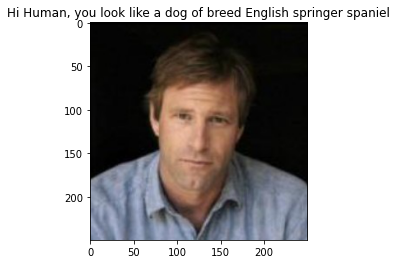

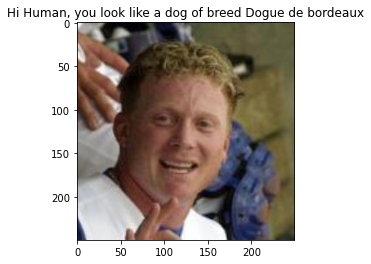

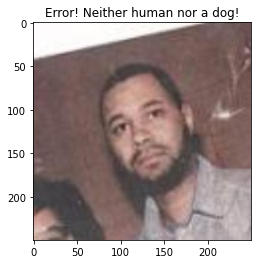

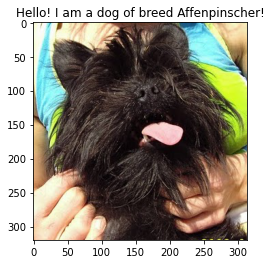

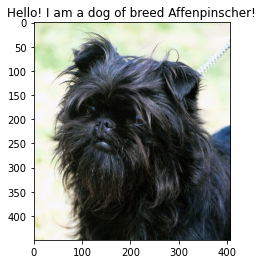

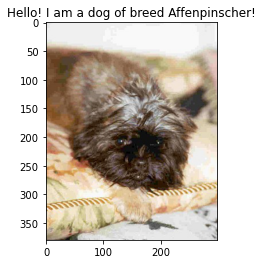

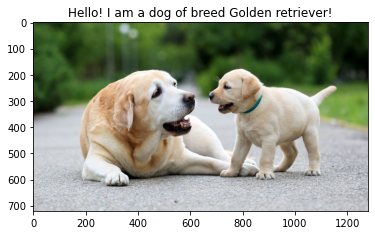

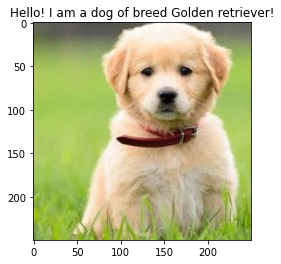

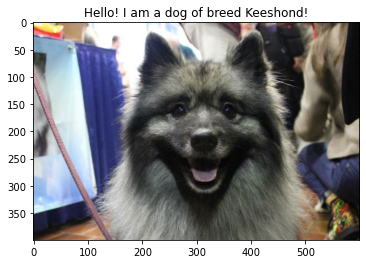

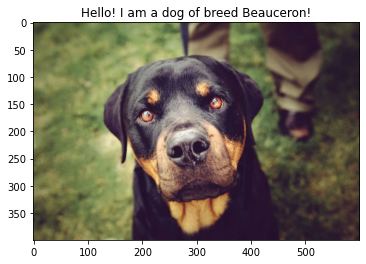

In [98]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)
    
run_app('golden_retreiver.jpg')
run_app('dog.jpg')
run_app('keeshond_dog_pictures.jpg')
run_app('rottweiler_dog_pictures.jpg')